In [68]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

# To load in the baseball data
import requests
#import io.StringIO
import zipfile

# special matplotlib argument for improved plots
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.prop_cycle'] = matplotlib.cycler(color=dark2_colors)
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['grid.color'] = 'white'

In [73]:
plt.style.use('seaborn')

## Recall from from lab last week 10/10/2014

Previously discussed: 

* Boston Housing data set
    * Predict housing prices
* Linear regression
    * Multiple ways to do this in python: `numpy`, `scipy`, `statsmodels`, `sklearn`

## Today, we will discuss the following:

* More linear regression using the `statmodels` python module
    * Old Faithful Geyser data set
    * Oakland baseball data set

<a href=https://raw.githubusercontent.com/cs109/2014/master/labs/Lab7_Notes.ipynb download=Lab7_Notes.ipynb> Download this notebook from Github </a> 


# `statsmodels`

[statsmodels](http://statsmodels.sourceforge.net) is python module specifically for estimating statistical models (less machine learning compared to `sklearn`). It can estimate many types of statistical models, but today we will focus on linear regression. 

### Recap of linear regression and least squares
Last week we learned, [linear regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explantory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship bewteen each predictor $X$ is linearly related to the dependent variable $Y$.  

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

On Tuesday in lecture, we learned how to write this model using matrix multiplication 

$$ Y = \beta X + \epsilon$$ 

where $Y$ has dimensions $n \times 1$, $X$ has dimensions $n \times p$ and $\epsilon$ has dimensions $n \times 1$.  On Tuesday, we also derived the [least squares](http://en.wikipedia.org/wiki/Least_squares) estimates of the coefficients of a linear model. These estimates minimize the difference between the following: 

$$ S = \sum_{i=1}^n r_i = \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))^2 $$

where $n$ is the number of observations.  

> The least squares estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ minimize the sum of the squared residuals $r_i = y_i - (\beta_0 + \beta_1 x_i)$ in the model (i.e. makes the difference bewteen the observed $y_i$ and linear model $\beta_0 + \beta_1 x_i$ as small as possible). 

### Old Faithful Geyser Data Set

The [Old Faithful Geyser](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/faithful.html) data set is a well-known data set that depicts the relationship of the waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA [[webcam]](http://yellowstone.net/webcams/). This data set is found in the base installation of the [R programming language](http://cran.r-project.org).  

`faithful` is a data set with 272 observations on 2 variables.

Column name| Description 
--- | --- 
eruptions | Eruption time (in mins)
waiting	| Waiting time to next eruption (in mins)

There is a function in `statsmodels` (or `sm` for short) called `sm.datasets.get_rdataset` which will download and return a data set found in [R](http://cran.r-project.org).  

Let's import the `faithful` dataset. 

In [6]:
faithful = sm.datasets.get_rdataset("faithful")

In [7]:
# Let's look at the help file
# sm.datasets.get_rdataset?
# faithful?

In [8]:
faithful.title

'Old Faithful Geyser Data'

In [9]:
faithful = faithful.data
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [10]:
faithful.shape

(272, 2)

# Histogram 

Create a histogram of the time between eruptions. What do you see? 

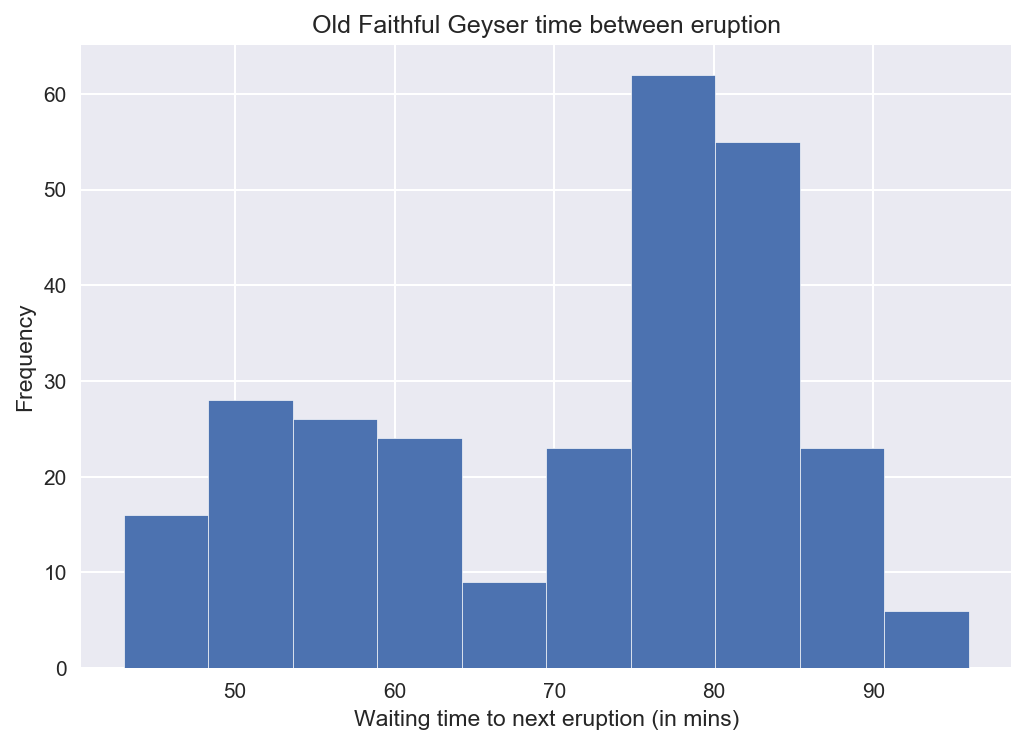

In [32]:
plt.hist(faithful.waiting, 
         edgecolor = 'white'
        )
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Frequency')
plt.title('Old Faithful Geyser time between eruption')
plt.show()

This histogram indicates [Old Faithful isn’t as “faithful” as you might think](http://people.stern.nyu.edu/jsimonof/classes/2301/pdf/geystime.pdf). 

### Scatter plot 

Create a scatter plot of the `waiting` on the x-axis and the `eruptions` on the y-axis. 

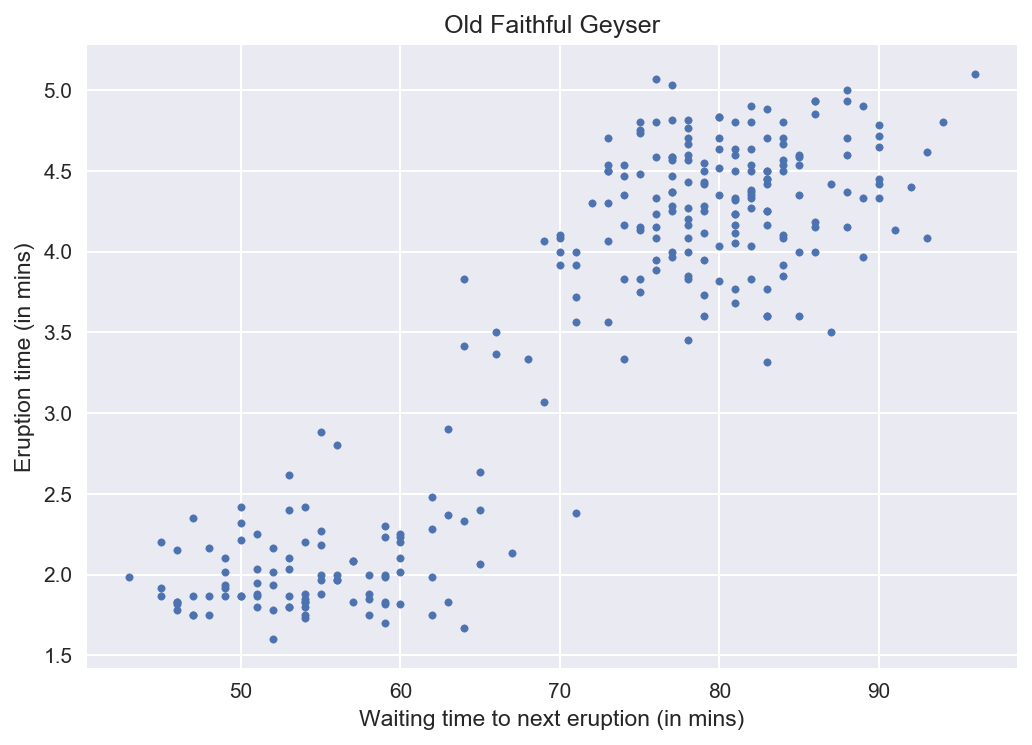

In [39]:
plt.scatter(faithful.waiting, faithful.eruptions, 
            marker = '.', alpha = 1)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Eruption time (in mins)')
plt.title('Old Faithful Geyser')
plt.show()

### Build a linear regression to predict eruption time using `statsmodels`

Now let's build a linear regression model for the `faithful` DataFrame, and estimate the next eruption duration if the waiting time since the last eruption has been 75 minutes.

$$ Eruptions = \beta_0 + \beta_1 * Waiting + \epsilon $$ 

In [40]:
X = faithful.waiting
y = faithful.eruptions
model = sm.OLS(y, X)

In [42]:
# Let's look at the options in model
# model.

In [43]:
results = model.fit()

In [45]:
# Let's look at the options in results
# results.<tab>

In [46]:
print (results.summary())

                                 OLS Regression Results                                
Dep. Variable:              eruptions   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              9621.
Date:                Mon, 04 May 2020   Prob (F-statistic):                   9.97e-214
Time:                        20:00:37   Log-Likelihood:                         -250.30
No. Observations:                 272   AIC:                                      502.6
Df Residuals:                     271   BIC:                                      506.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [47]:
results.params.values

array([0.05012919])

We notice, there is no intercept ($\beta_0$) fit in this linear model.  To add it, we can use the function `sm.add_constant`.  

In [48]:
X = sm.add_constant(X)
X.head()

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,waiting
0,1.0,79
1,1.0,54
2,1.0,74
3,1.0,62
4,1.0,85


Now let's fit a linear regression model with an intercept. 

In [49]:
modelW0 = sm.OLS(y, X)
resultsW0 = modelW0.fit()
print (resultsW0.summary())

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Mon, 04 May 2020   Prob (F-statistic):          8.13e-100
Time:                        20:10:15   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8740      0.160    -11.702      0.0

If you want to predict the time to the next eruption using a waiting time of 75, you can directly estimate this using the equation 

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 * 75 $$ 

or you can use `results.predict`.  

In [50]:
newX = np.array([1,75])
resultsW0.params[0]*newX[0] + resultsW0.params[1] * newX[1]

3.7980801099789647

In [51]:
resultsW0.predict(newX)

array([3.79808011])

Based on this linear regression, if the waiting time since the last eruption has been 75 minutes, we expect the next one to last approximately 3.80 minutes.

### Plot the regression line 

Instead of using `resultsW0.predict(X)`, we can use `resultsW0.fittedvalues` which are the $\hat{y}$. 

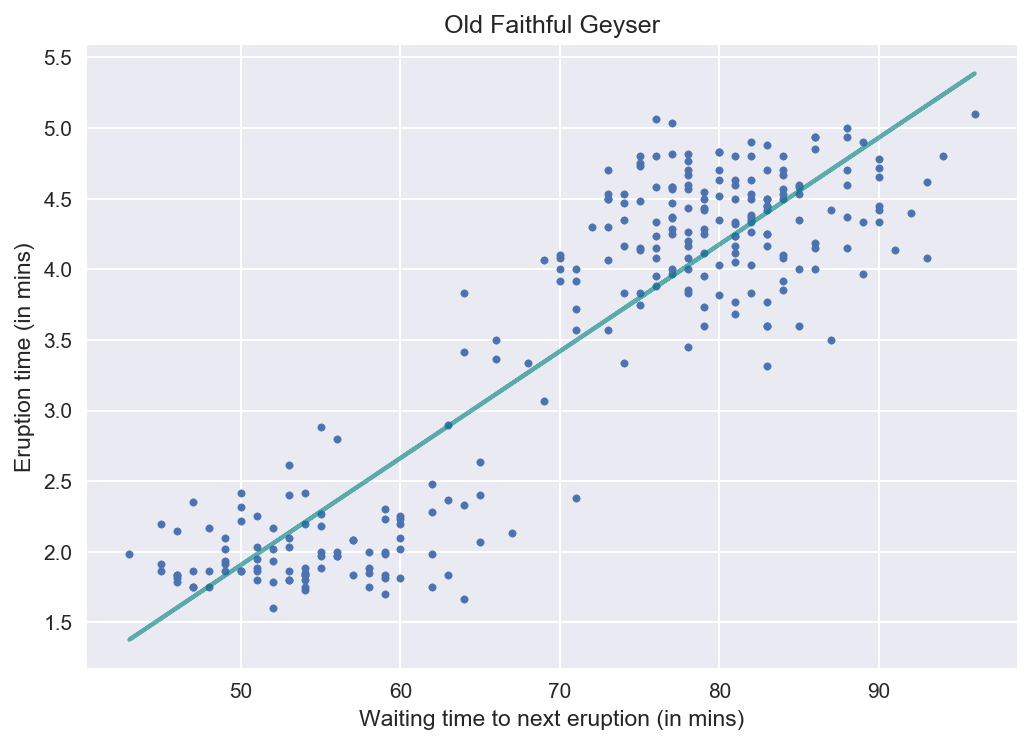

In [55]:
plt.scatter(faithful.waiting, faithful.eruptions, marker = '.')
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Eruption time (in mins)')
plt.title('Old Faithful Geyser')

plt.plot(faithful.waiting, resultsW0.fittedvalues, color='teal', linewidth=2, alpha = 0.6)
plt.show()

### Residuals, residual sum of squares, mean squared error

Recall, we can directly calculate the residuals as 

$$r_i = y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i)$$

To calculate the residual sum of squares, 

$$ S = \sum_{i=1}^n r_i = \sum_{i=1}^n (y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i))^2 $$

where $n$ is the number of observations.  Alternatively, we can simply ask for the residuals using `resultsW0.predict`

In [56]:
resids = faithful.eruptions - resultsW0.predict(X)

In [57]:
resids = resultsW0.resid

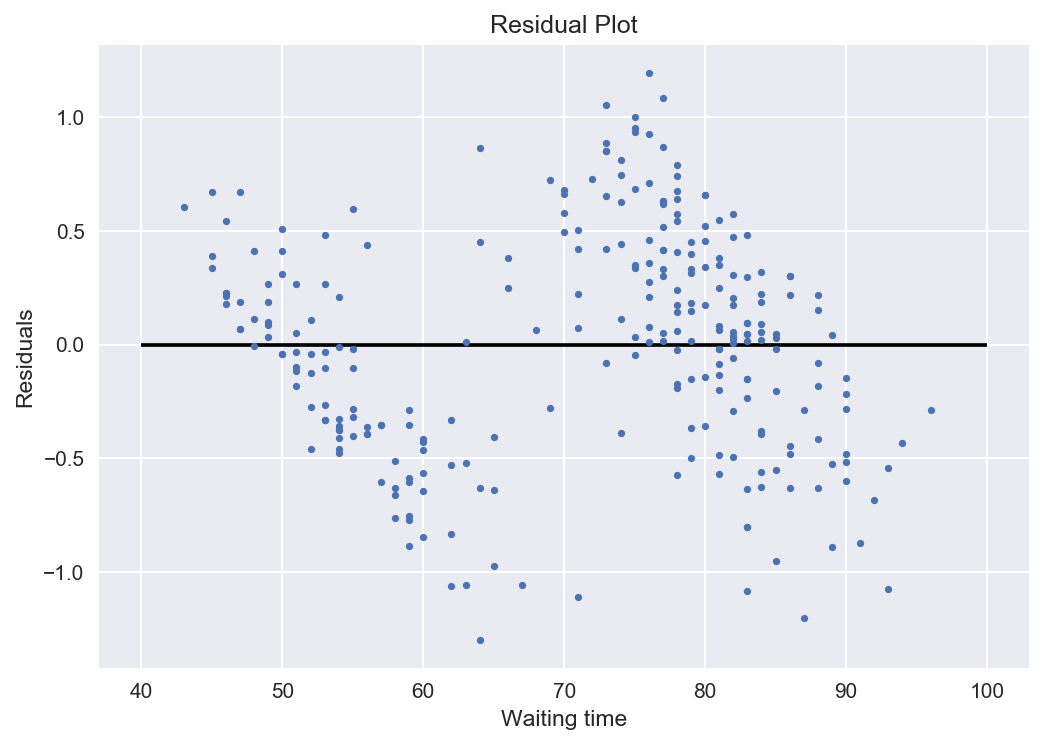

In [59]:
plt.plot(faithful.waiting, resids, '.')
plt.hlines(y = 0, xmin=40, xmax = 100)
plt.xlabel('Waiting time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The residual sum of squares: 

In [60]:
print (np.sum((faithful.eruptions - resultsW0.predict(X)) ** 2))

66.56177571269984


Mean squared error: 

In [61]:
print (np.mean((faithful.eruptions - resultsW0.predict(X)) ** 2))

0.24471241070845529


### Build a linear regression to predict eruption time using least squares 

Now let's build a linear regression model for the `faithful` DataFrame, but instead of using `statmodels` (or `sklearn`), let's use the least squares estimates of the coefficients for the linear regression model.

$$ \hat{\beta} = (X^{\top}X)^{-1} X^{\top}Y $$ 

The `numpy` function [`np.dot`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html#numpy.dot) is the dot product (or inner product) of two vectors (or arrays in python).  

The `numpy` function [`np.linalg.inv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html#numpy.linalg.inv) can be used to compute the inverse of a matrix. 

In [62]:
X = sm.add_constant(faithful.waiting)
y = faithful.eruptions

First, compute $X^{\top}X$

In [63]:
np.dot(X.T, X)

array([[2.720000e+02, 1.928400e+04],
       [1.928400e+04, 1.417266e+06]])

Next, compute the inverse of $X^{\top}X$ or $(X^{\top}X)^{-1}$. 

In [64]:
np.linalg.inv(np.dot(X.T, X))

array([[ 1.04029479e-01, -1.41547492e-03],
       [-1.41547492e-03,  1.99652136e-05]])

Finally, compute $\hat{\beta} = (X^{\top}X)^{-1} X^{\top}Y $

In [65]:
beta = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
print ("Directly estimating beta:", beta)
print ("Estimating beta using statmodels: ", resultsW0.params.values)

Directly estimating beta: [-1.87401599  0.07562795]
Estimating beta using statmodels:  [-1.87401599  0.07562795]


# Baseball data from Homework 1

Let's return back to the baseball data from [Homework 1](http://nbviewer.ipython.org/github/cs109/2014/blob/master/homework-solutions/HW1-solutions.ipynb). In Problem 1(e), we asked all the students registered in 209 to complete the following problem: 

> Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect a competitive advantage in years 2001-2003 for the Oakland baseball team

### Load baseball data (salaries and wins)

In [69]:
def getZIP(zipFileName):
    r = requests.get(zipFileName).content
    s = io.StringIO.StringIO(r)
    zf = zipfile.ZipFile(s, 'r') # Read in a list of zipped files
    return zf

url = 'http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip'
zf = getZIP(url)
tablenames = zf.namelist()

salaries = pd.read_csv(zf.open(tablenames[tablenames.index('Salaries.csv')]))
teams = pd.read_csv(zf.open(tablenames[tablenames.index('Teams.csv')]))
teams = teams[['yearID', 'teamID', 'W']]

totSalaries = salaries.groupby(['yearID','teamID'], as_index=False).sum()
joined = pd.merge(totSalaries, teams, how="inner", on=['yearID', 'teamID'])
joined.head()

NameError: name 'io' is not defined

For each year, we perform the following: 

1. Calculate the least squares estimate of the coefficients in a linear regression model where x = salaries (in millions) and y = total wins. 
2. Calculate the residuals for each team: $$r_i = y_i - \hat{y}_i$$
3. Plot the residuals for each team across time. 

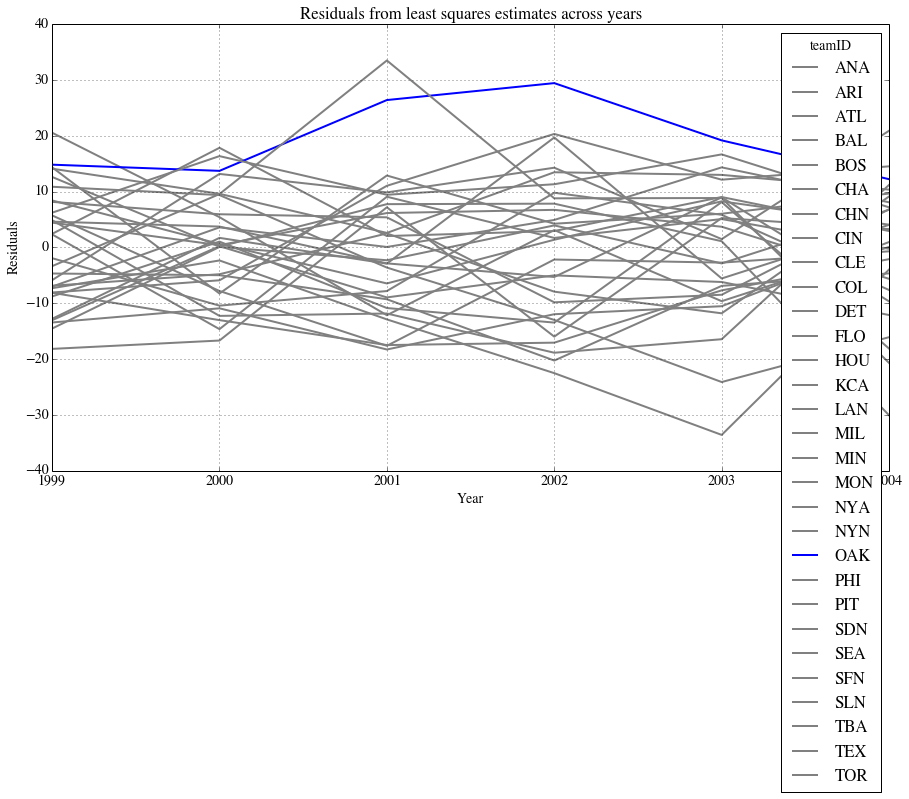

In [37]:
teamName = 'OAK'
years = np.arange(1999, 2005)
residData = pd.DataFrame()

for yr in years: 
    df = joined[joined['yearID'] == yr]
    X = df['salary'].values / 1e6
    X = sm.add_constant(X)
    y = df['W'].values

    # least squares estimates
    model = sm.OLS(y, X)
    results = model.fit() # fit the linear regression model
    beta = results.params # least squares coefficients
    yhat = (beta[0] + beta[1]*X[:,1]) # regression line
    residData[yr] = results.resid # residuals = y - yhat
  
residData.index = df['teamID']
residData = residData.T
residData.index = residData.index.format()

residData.plot(title = 'Residuals from least squares estimates across years', figsize = (15, 8),
               color=map(lambda x: 'blue' if x=='OAK' else 'gray',df.teamID))
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

# Let's try an example together

We will revisit the Motor Trend Car Road Tests data set used in [Lab 3](http://nbviewer.ipython.org/github/cs109/2014/blob/master/labs/Lab3_Notes.ipynb) and build a linear regression model to predict miles per gallon (`mpg`). 

## Motor Trend Car Road Tests Data

We previously looked at the [mtcars](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html) data set in [Lab 3](http://nbviewer.ipython.org/github/cs109/2014/blob/master/labs/Lab3_Notes.ipynb). The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). This data set is also found in the base installation of the [R programming language](http://cran.r-project.org).  

Column name | Description 
--- | --- 
mpg | Miles/(US) gallon
cyl | Number of cylinders
disp | Displacement (cu.in.)
hp | Gross horsepower
drat | Rear axle ratio
wt | Weight (lb/1000)
qsec | 1/4 mile time
vs | V/S
am | Transmission (0 = automatic, 1 = manual)
gear | Number of forward gears
carb | Number of carburetors

First, read in the `mtcars` data set using the `sm.datasets.get_rdataset` function to import the dataset from R. 

In [70]:
# your turn
mtcars = sm.datasets.get_rdataset("mtcars")
mtcars = mtcars.data

### Histogram

Text(0.5, 0, 'Miles Per Gallon')

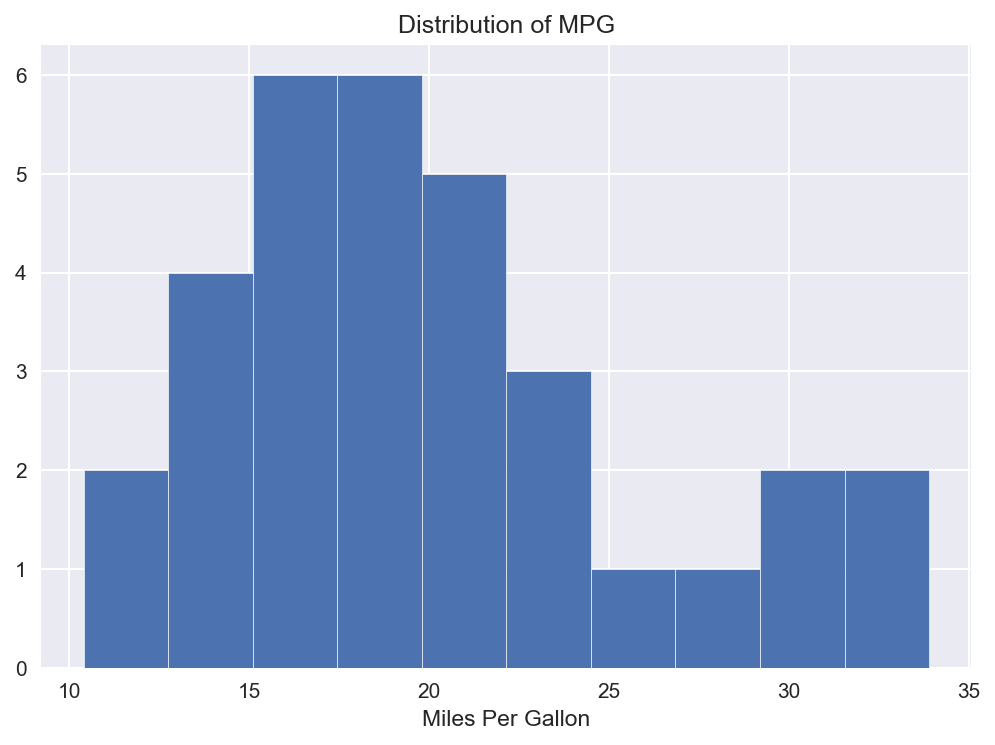

In [74]:
mtcars['mpg'].hist(edgecolor = 'white')
plt.title('Distribution of MPG')
plt.xlabel('Miles Per Gallon')

### Scatter plots

Relationship between `cyl` and `mpg`

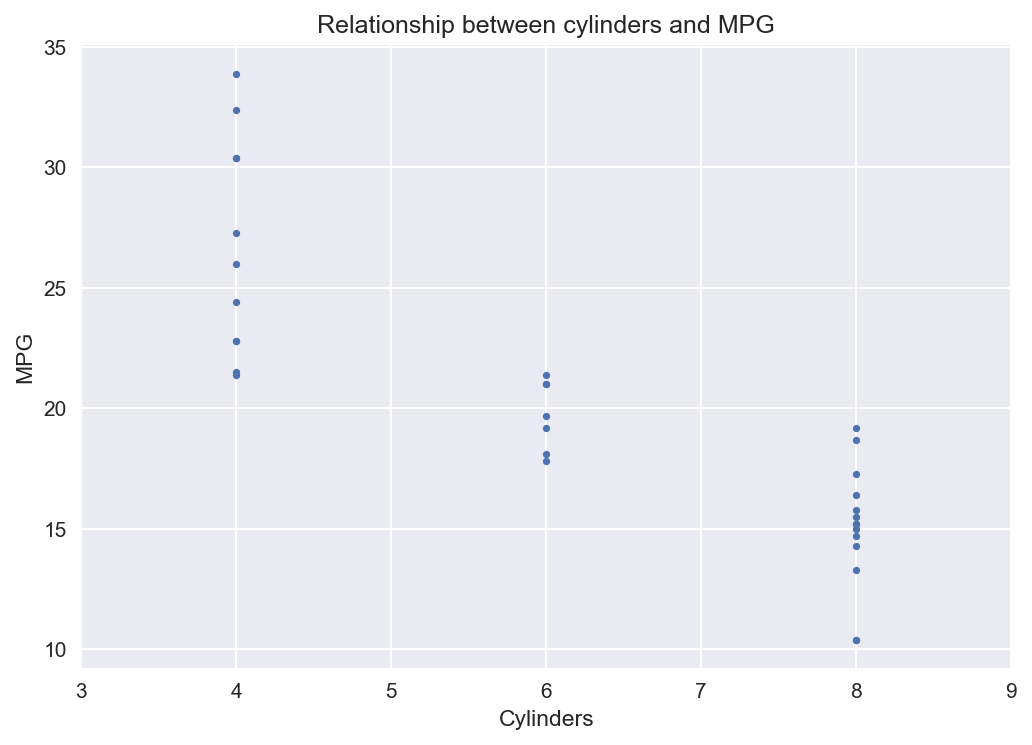

In [78]:
plt.plot(mtcars.cyl, mtcars.mpg, '.')
plt.xlim(3, 9)
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.title('Relationship between cylinders and MPG')
plt.show()

Relationship between `horsepower` and `mpg`

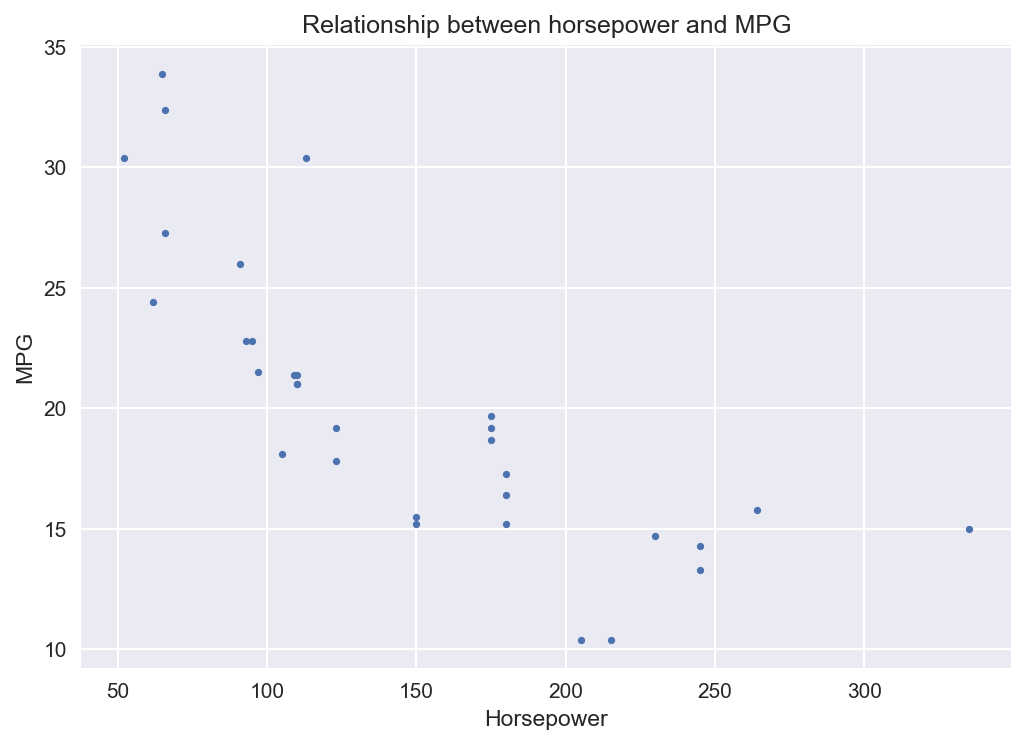

In [79]:
plt.plot(mtcars.hp, mtcars.mpg, '.')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Relationship between horsepower and MPG')
plt.show()

### Build a linear regression to predict mpg using `statsmodels`

Now let's build a linear regression model for the `mtcars` DataFrame, and estimate predicted `mpg` given a new car has 6 cylinders and 180 horsepower.  

$$ MPG = \beta_0 + \beta_1 * cylinders + \beta_2 * horsepower + \epsilon $$ 

In [80]:
# your turn
y = mtcars.mpg
X = mtcars[['cyl', 'hp']]
X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     41.42
Date:                Mon, 04 May 2020   Prob (F-statistic):           3.16e-09
Time:                        20:59:44   Log-Likelihood:                -80.781
No. Observations:                  32   AIC:                             167.6
Df Residuals:                      29   BIC:                             172.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9083      2.191     16.847      0.0

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [81]:
newX = np.array([1, 6, 180])
results.predict(newX)

array([19.87826354])

What if a new car had 4 cylinders and 120 horsepower? 

In [82]:
# your turn
newX = np.array([1, 4, 120])
results.predict(newX)

array([25.55495252])

Now estimate the least squares estimates for $\beta_0$, $\beta_1$ and $\beta_2$ using matrix multiplication and the formula: 

$$ \hat{\beta} = (X^{\top}X)^{-1} X^{\top}Y $$

In [83]:
# your turn
beta = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
beta

array([ 3.69083305e+01, -2.26469360e+00, -1.91216965e-02])

# Many different types of regression

You do not always have a continuous $y$ variable that you are measuring.  Sometimes it may be binary (e.g. 0 or 1). Sometimes it may be count data.  What do you do?

Use other types of regression besides just simple linear regression.  

[Nice summary of several types of regression](http://www.datasciencecentral.com/profiles/blogs/10-types-of-regressions-which-one-to-use). 